# Team as an entity model

This model is a

In [1]:
# Import
from torch import nn
from torch.utils.data import DataLoader, random_split

from models.models import *
from datasets.datasets import *
from utils import *

In [2]:
# Meta
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset

In [3]:
file = './Data/team/processed/team_data.xlsx'
dataset = get_team_dataset(file)

# Dataloader

In [4]:
batch_size = 100
test_length = len(dataset)//10
train_length = len(dataset) - test_length

print(test_length)
print(train_length)
dataset_test, dataset_train = random_split(dataset, [test_length, train_length])


# Must generate batches of sequence data with the following format:
# (batch_size, num_seasons(N), input_size(num stats))
# (https://stackoverflow.com/questions/49466894/how-to-correctly-give-inputs-to-embedding-lstm-and-linear-layers-in-pytorch/49473068#49473068)
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

print(dataset_train.__getitem__(0))

63
574
(tensor([[0.4150, 2.5100, 3.1300],
        [0.4210, 2.3400, 2.9300],
        [0.5790, 3.0500, 2.8500],
        [0.6400, 3.2900, 2.8000],
        [0.6100, 3.4900, 3.0400]]), tensor([0.5790, 3.3900, 3.1700]))


# Training and Validation

In [5]:
# NOTE: N will be variable, as the input size
input_size = len(dataset_train.__getitem__(0)[0][0])
hidden_size = 50
model = TeamAsEntity(input_size=input_size, hidden_size=hidden_size, device=device).to(device)

In [6]:
criterion = RMSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)
epochs = 1500
loss_interval = 25

In [7]:
(model, train_losses, val_losses) = train_and_validate(model, criterion, optimizer, dataloader_train, dataloader_test, epochs=epochs, loss_interval=loss_interval, device=device)

0 th epoch :  2.343527317047119
Validation loss for epoch 0: [2.3663198947906494]
Validation loss for epoch 25: [1.4561439752578735]
50 th epoch :  1.1658470630645752
Validation loss for epoch 50: [1.1983774900436401]
Validation loss for epoch 75: [1.0261608362197876]
100 th epoch :  0.873277485370636
Validation loss for epoch 100: [0.8722638487815857]
Validation loss for epoch 125: [0.7319855690002441]
150 th epoch :  0.6213855147361755
Validation loss for epoch 150: [0.6067201495170593]
Validation loss for epoch 175: [0.5001407861709595]
200 th epoch :  0.4147484302520752
Validation loss for epoch 200: [0.4169079065322876]
Validation loss for epoch 225: [0.36042049527168274]
250 th epoch :  0.31717076897621155
Validation loss for epoch 250: [0.3287978172302246]
Validation loss for epoch 275: [0.31484130024909973]
300 th epoch :  0.3276570439338684
Validation loss for epoch 300: [0.3101467788219452]
Validation loss for epoch 325: [0.3091904819011688]
350 th epoch :  0.2860912978649139

# Plot Results

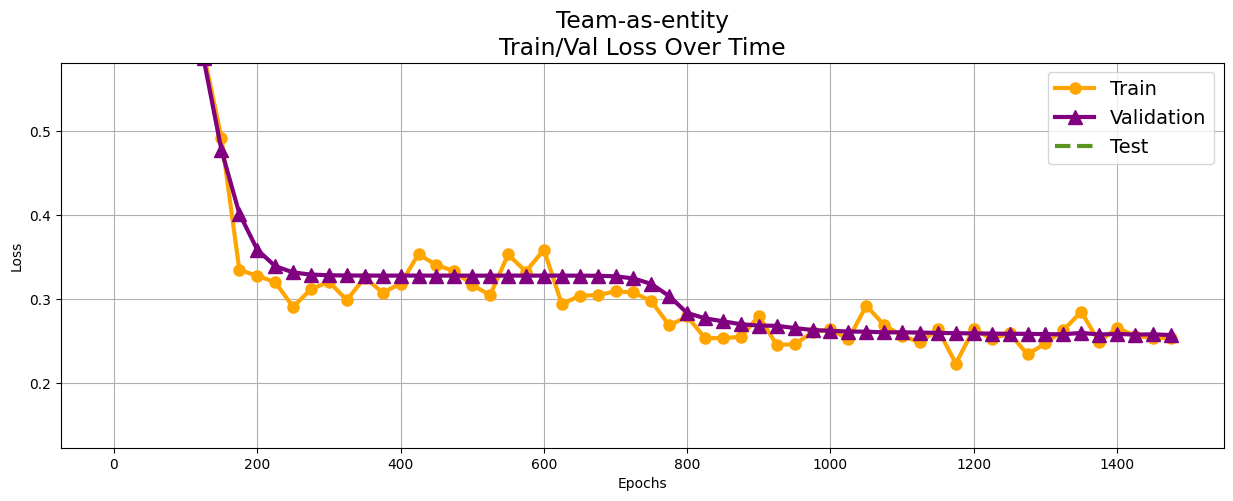

In [ ]:
plot_train_v_loss(train_losses, val_losses, loss_interval)